In [1]:
from duckmodel import DuckModel
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [3]:
N_agents = 20
m=DuckModel(20,40,40)
N_steps = 200
for _ in tqdm(range(N_steps)):
    m.step()

100%|████████████████████████████████████████| 200/200 [00:02<00:00, 72.73it/s]


In [4]:
std = m.datacollector.get_model_vars_dataframe()

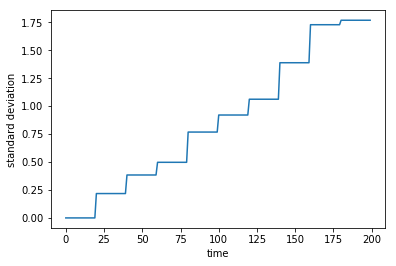

In [5]:
plt.plot(std)
plt.xlabel("time")
plt.ylabel("standard deviation")
plt.show()

(4000, 1)


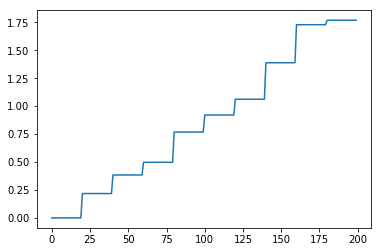

In [22]:
aggression = m.datacollector.get_agent_vars_dataframe()

array = aggression.values

array = array[::2]
print(array.shape)
array = array.reshape((N_steps,N_agents))
array[46,:]


stds = []
for a in array:
    stds.append(np.std(a))

plt.plot(range(len(stds)), stds)
plt.show()

In [1]:
a=array.reshape(4000,1)
a.reshape(200)

NameError: name 'array' is not defined

In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

# Generate samples
param_values = saltelli.sample(problem, 1000)

# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])

Parameter S1 S1_conf ST ST_conf
x1 0.307975 0.059037 0.560137 0.090561
x2 0.447767 0.053887 0.438722 0.041791
x3 -0.004255 0.054949 0.242845 0.024564

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 0.012205 0.077931
x1 x3 0.251526 0.105210
x2 x3 -0.009954 0.066815
[ 0.30797549  0.44776661 -0.00425452]
